In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot, show_result
import mmcv
import numpy as np

In [2]:
config_file = '/home/zhongying/other/walkgis/mmdetection/zy/htc_new_set/2019_11_11/test_htc_dconv_c5_r101_fpn_sbn_20e_total.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '/home/zhongying/other/walkgis/mmdetection/zy/htc_new_set/2019_11_11/epoch_100.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

In [4]:
# test a single image
#img = '/home/zhongying/dataset/WalkValidationData/ValidDataCuoJianLouJian/22_015360_020480.tif'
#img = mmcv.imread(img)
img = np.zeros((1024,1024,3),dtype=np.uint8)
img[:,:,0] += 255
result = inference_detector(model, img)

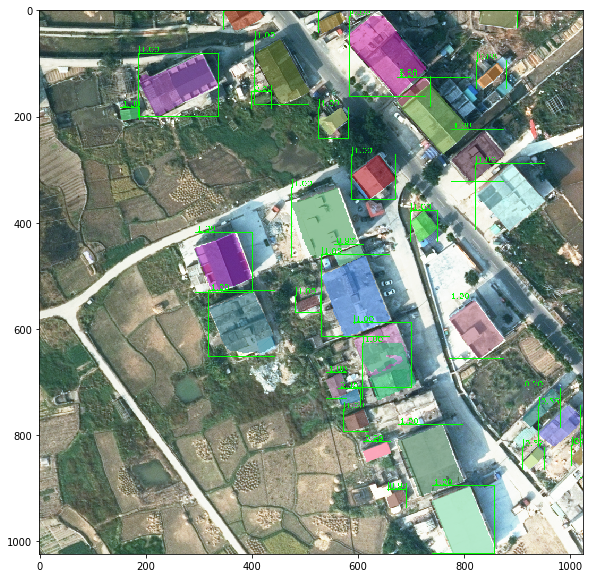

In [5]:
# show the results
show_result_pyplot(img, result, [''])#, score_thr=0.001)

In [6]:
img_crop = mmcv.imcrop(img, np.array([512,512,1024,1024]))
img_crop = mmcv.imresize(img_crop, (1024, 1024))
result_crop = inference_detector(model, img_crop)

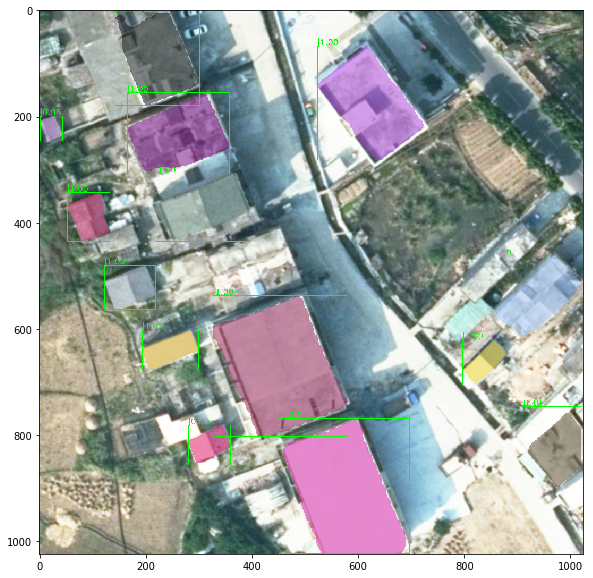

In [7]:
# show the results
show_result_pyplot(img_crop, result_crop, [''])#, score_thr=0.001)

In [9]:
mmcv.imwrite(show_result(img, result, [''], score_thr=0.001, show=False), '/home/zhongying/other/walkgis/mmdetection/demo/tmp.jpg')
mmcv.imwrite(show_result(img_crop, result_crop, [''], score_thr=0.001, show=False), '/home/zhongying/other/walkgis/mmdetection/demo/tmp1.jpg')

True

In [12]:
result_1_0 = result[1][0]
